<a href="https://colab.research.google.com/github/melvinps/Data-Analysis-Schindler-Lift-Singapore/blob/main/Callback_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Callback classification using SCS B Code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.colab.data_table

In [ ]:
df = pd.read_excel('2021 05 04 Daily Callbacks (1).xlsx')

In [ ]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description','SCS B']].dropna(how='all')

In [ ]:
df['SCS B'] = df['SCS B'].fillna(-1).astype(int)

In [ ]:
df_call_des = df.drop(['Location','Notification date','Name','Description of technical object'], axis = 1)

In [ ]:
df_call_des['Callback Classification'] = df['SCS B'].replace({0:'Fault unknown',             
                                                      10:'Main power supply',
                                                      11:'Fuses',
                                                      12:'Relays/Contactors/Electrical component',
                                                      13:'Electronic components',
                                                      14:'Floor selector information',
                                                      15:'Electrical Shaft & Safety components',
                                                      16:'Landing panels and indicators',
                                                      17:'Landing door lock',
                                                      18:'Landing door components',
                                                      19:'Car operating panel & Indicators',
                                                      20:'Car lighting',
                                                      21:'Car safety devices',
                                                      22:'Car components',
                                                      23:'Car door safety contact and devices',
                                                      24:'Car door operator components',
                                                      25:'Car Safety gear',
                                                      26:'Drive system',
                                                      27:'Brake',
                                                      29:'Speed control system',
                                                      36:'Suspension means',
                                                      37:'Compensation means',
                                                      38:'Counterweight',
                                                      33:'Tele alarm / Telemonitoring power',
                                                      34:'Tele alarm / Telemonitoring connection',
                                                      35:'Tele alarm / Telemonitoring components',
                                                      99:'Other',
                                                      39:'Steps',
                                                      40:'Combplate',
                                                      41:'Handrail',
                                                      42:'Safety components',
                                                      54:'Temperature outside operational limits',
                                                      55:'Flooding',
                                                      56:'Earthquake',
                                                      57:'Main power failure',
                                                      58:'No telephone line',
                                                      59:'External element blocking doors',
                                                      60:'Fire', 
                                                      -1:'No Entry'})

In [ ]:
df_count = df_call_des.drop(['Description','Long Text Description'], axis=1)
df_count = df_count.rename(columns={'SCS B':'Count'})
temp = df_count[['Callback Classification','Count']]
temp

,Callback Classification,Count
0,Other,99
1,Fault unknown,0
2,Landing door components,18
3,Relays/Contactors/Electrical component,12
4,Car safety devices,21
...,...,...
4157,Relays/Contactors/Electrical component,12
4158,External element blocking doors,59
4159,External element blocking doors,59
4160,External element blocking doors,59


In [ ]:
df_v = temp.groupby('Callback Classification').count().reset_index()
df_v = df_v.sort_values(by=['Count'], ascending= False)
df_v


,Callback Classification,Count
32,Other,715
7,Car door operator components,409
25,Landing door components,389
17,Electronic components,376
30,No Entry,345
33,Relays/Contactors/Electrical component,338
26,Landing door lock,232
19,Fault unknown,124
4,Brake,122
8,Car door safety contact and devices,120


In [ ]:
temp2 = df_v.set_index('Callback Classification')
temp2
total = len(temp)

other = temp2.loc[temp2.index == 'Other']['Count'].values
other_percentage = (other/total)*100
v = other_percentage[0].round(2)
No = temp2.loc[temp2.index == 'No Entry']['Count'].values
No_percentage = (No/total)*100
No_percentage
n = No_percentage[0].round(2)
print('Percentage of "Other": ' + str(v) + '%')
print('Percentage of "No Entry": ' + str(n) + '%')

Percentage of "Other": 17.18%
Percentage of "No Entry": 8.29%


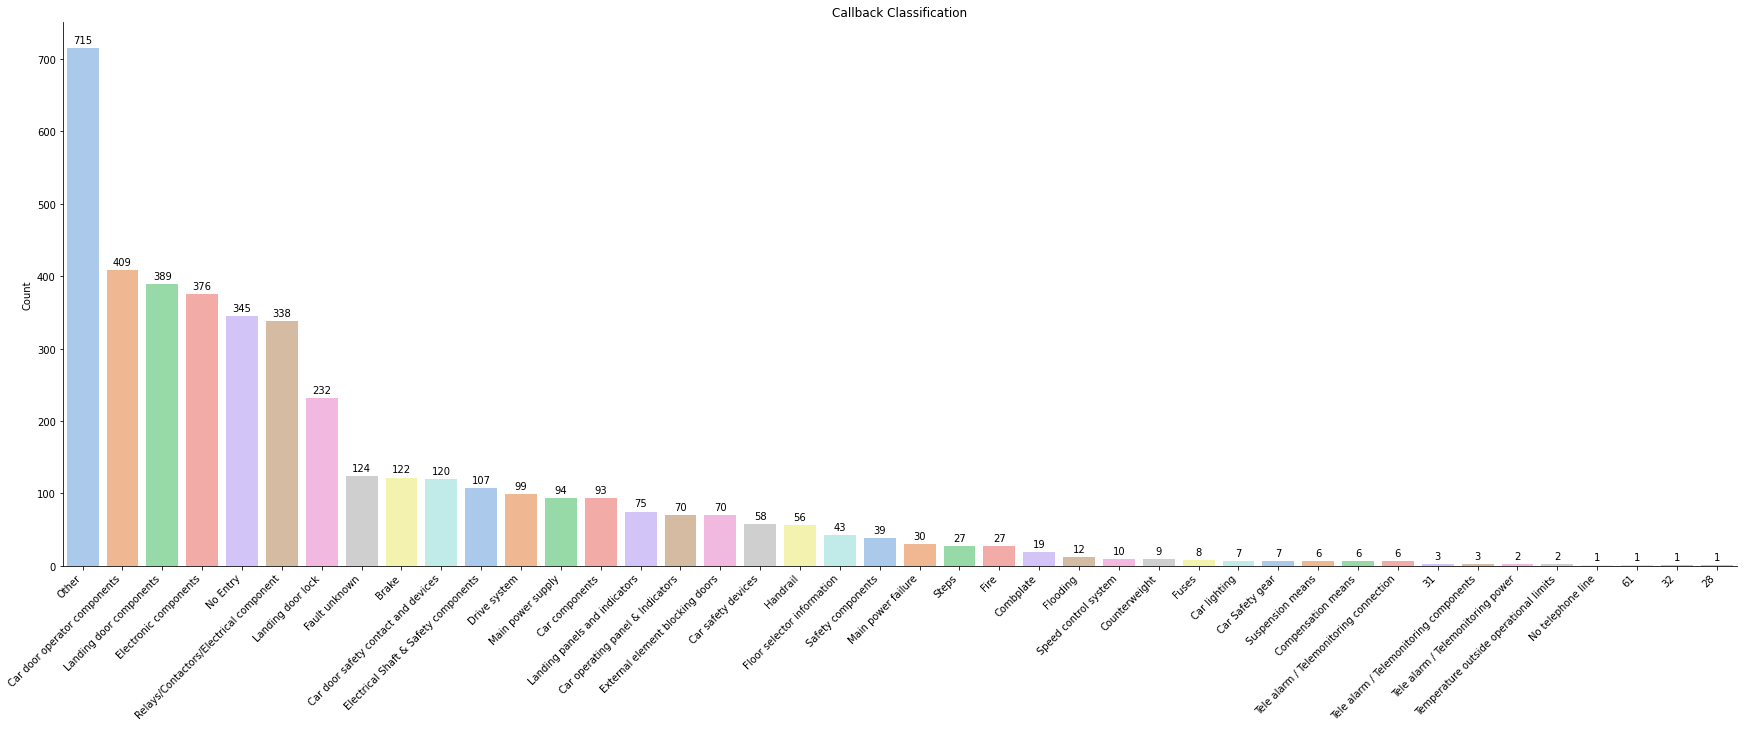

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
g =sns.barplot(x='Callback Classification',y='Count',data=df_v ,ax=ax, palette='pastel')

plt.xticks(rotation=45, ha='right')
g.set_xlabel(' ')
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.set_title('Callback Classification')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 8), 
               textcoords = 'offset points')

# **Callback Classification using NLP**

In [94]:
df = pd.read_excel('Engineer workshop CB Collated doors copy.xlsx', sheet_name="Sheet1")

In [102]:
df = df[['Long Text Description','Category ','Catergory(Others) ']].dropna(how='all')
df['Category '].unique()

array(['Others ', 'Reset', 'Landing door ', 'Controller ', 'Governor',
       'Brake', 'Car door ', 'Print', 'RKPH', 'Drive', 'Safety Circuit ',
       'Buttons', 'Yellow Light Reset ', 'Intercom ', 'User Misuse',
       'Fire Reset ', 'Safety gear', 'O-ring', 'Intercom', nan],
      dtype=object)

In [110]:
df_other = df.loc[df['Category '] == 'Others ']
df_other 

,Long Text Description,Category,Catergory(Others)
0,"Check and secure COP Panel, lift back to normal.",Others,COP
1,Lift running when arrival..checked 31st floor ...,Others,User misuse
3,Checked no error..tested and learn trip car..t...,Others,No fault
4,"Error TKON 0004,checked position tacho and mag...",Others,Shaft info
14,Lift running on arrival Chk no any errorlogs,Others,No fault
...,...,...,...
10019,"Lift faulty due to power failure, building shu...",Others,Building power
10023,"Check no errorlog show , monitor lift running ...",Others,No fault
10024,"On arrival lift running normal,check 20 floor ...",Others,No fault
10025,1st floor landing door bang by someone . Readj...,Others,User misuse


In [111]:
df_other = df_other.drop(['Category '],axis = 1)
df_other = df_other.rename(columns={"Catergory(Others) ": "Category"})
df_other

,Long Text Description,Category
0,"Check and secure COP Panel, lift back to normal.",COP
1,Lift running when arrival..checked 31st floor ...,User misuse
3,Checked no error..tested and learn trip car..t...,No fault
4,"Error TKON 0004,checked position tacho and mag...",Shaft info
14,Lift running on arrival Chk no any errorlogs,No fault
...,...,...
10019,"Lift faulty due to power failure, building shu...",Building power
10023,"Check no errorlog show , monitor lift running ...",No fault
10024,"On arrival lift running normal,check 20 floor ...",No fault
10025,1st floor landing door bang by someone . Readj...,User misuse


In [122]:
df_other = df_other.dropna()

In [118]:
df_other.groupby(['Category']).count()

,Long Text Description
Category,
Battery,108
Building power,171
CDD,17
CIP,27
COP,124
CWT,12
"Car (light, fan, interior)",172
Card Reader,41
Follow up,292


In [115]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [124]:
df_other['Long Text Description'].head(5).apply(text_process)

0       [Check, secure, COP, Panel, lift, back, normal]
1     [Lift, running, arrivalchecked, 31st, floor, l...
3     [Checked, errortested, learn, trip, cartested,...
4     [Error, TKON, 0004checked, position, tacho, ma...
14             [Lift, running, arrival, Chk, errorlogs]
Name: Long Text Description, dtype: object

In [119]:
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_other['Long Text Description'])
print(len(transformer.vocabulary_))

9255


In [126]:
messages_bow = bow_transformer.transform(df_other['Long Text Description'])

In [36]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

Shape of Sparse Matrix:  (9936, 9255)
Amount of Non-Zero occurences:  112049
sparsity: 0


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [42]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [127]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df_other['Long Text Description'], df_other['Category'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3041 761 3802


In [211]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier #Best performance
from sklearn.svm import SVC

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [212]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f005377c4d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [213]:
predictions = pipeline.predict(msg_test)

In [215]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

                            precision    recall  f1-score   support

                  Battery        0.83      0.74      0.78        27
           Building power        0.76      0.76      0.76        37
                       CDD       0.00      0.00      0.00         0
                       CIP       0.50      1.00      0.67         3
                      COP        0.77      0.77      0.77        22
                       CWT       0.50      1.00      0.67         2
Car (light, fan, interior)       0.71      0.56      0.63        39
               Card Reader       1.00      0.69      0.82        13
                 Follow up       0.33      0.56      0.42        32
                Guide shoe       0.75      0.56      0.64        16
                       LIP       0.77      0.71      0.74        14
                       LMS       0.77      0.83      0.80        12
                       LOP       0.77      0.59      0.67        29
                      LOP        0.00      0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
pred_df = pd.read_excel('2021 05 04 Daily Callbacks (1).xlsx')

In [220]:
pred_df = pred_df[['Long Text Description','SCS B']].dropna(how='all')
pred_df

,Long Text Description,SCS B
0,On arrival check car top INS mode reset back l...,99.0
1,Lift stop need further checking,0.0
2,Error safety T4 check level 4 landing door sil...,18.0
3,JFIl breaker trip. Lift stop. Need to replace ...,12.0
4,Overspeed error. Checked and tightened governo...,21.0
...,...,...
4157,Informed that asix b PCB need to be replaced,12.0
4158,Sips breaker trip (reset breaker & monitor lif...,59.0
4159,Need to follow up lobby vision on Monday(all l...,59.0
4160,"Error 1508 , check 1st flr landing door sill s...",59.0


In [221]:
pred_df1 = pred_df.loc[pred_df['SCS B'] == float(99.0)]
pred_df1 = pred_df1.dropna()
new_pred = pred_df1.reset_index(drop=True)
new_pred


,Long Text Description,SCS B
0,On arrival check car top INS mode reset back l...,99.0
1,On arrival check lift normal .Error safety T4 ...,99.0
2,Check travel cable dangling sound..secured pro...,99.0
3,Lift under fireman mode sw fr fireman mode fau...,99.0
4,Card reader faulty. Follow up quotation.,99.0
...,...,...
706,'-False call technician on side jewel photosho...,99.0
707,Readjusted and tighten the floor broad contact...,99.0
708,Building breaker tripped.,99.0
709,Building breaker tripped,99.0


In [222]:
predictions = pipeline.predict(new_pred['Long Text Description'])

In [223]:
p = pd.DataFrame(predictions , columns=['Category Others'])
p

,Category Others
0,No fault
1,User misuse
2,No fault
3,Service mode
4,Card Reader
...,...
706,No fault
707,Wiring
708,Building power
709,Building power


In [225]:
new_pred['SCS B'] = p
new_pred = new_pred.rename(columns={"SCS B": "Category Others"})
new_pred

,Long Text Description,Category Others
0,On arrival check car top INS mode reset back l...,No fault
1,On arrival check lift normal .Error safety T4 ...,User misuse
2,Check travel cable dangling sound..secured pro...,No fault
3,Lift under fireman mode sw fr fireman mode fau...,Service mode
4,Card reader faulty. Follow up quotation.,Card Reader
...,...,...
706,'-False call technician on side jewel photosho...,No fault
707,Readjusted and tighten the floor broad contact...,Wiring
708,Building breaker tripped.,Building power
709,Building breaker tripped,Building power


In [230]:
plot = new_pred.groupby('Category Others').count().reset_index().sort_values(by=['Long Text Description'], ascending= False)
plot

,Category Others,Long Text Description
17,No fault,184
25,User misuse,89
21,Shaft info,64
13,Lift stop,59
7,Follow up,36
1,Building power,32
20,Service mode,27
26,Wiring,24
11,LOP,23
5,"Car (light, fan, interior)",23


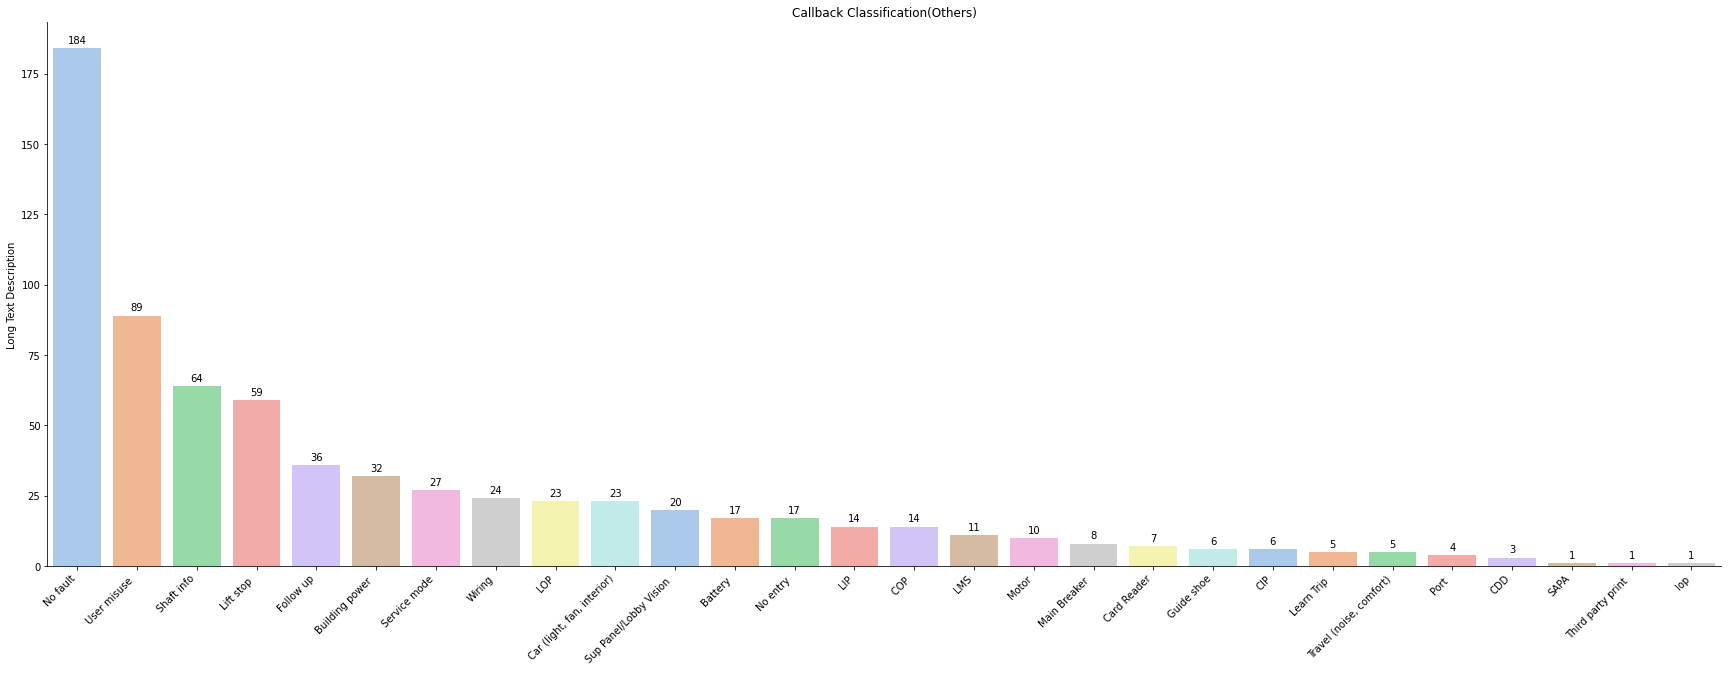

In [231]:
fig, ax = plt.subplots(figsize=(30,10))
g =sns.barplot(x='Category Others',y='Long Text Description',data=plot ,ax=ax, palette='pastel')

plt.xticks(rotation=45, ha='right')
g.set_xlabel(' ')
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.set_title('Callback Classification(Others)')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 8), 
               textcoords = 'offset points')

**CONCLUSION**

The performance of Random Forest Classifier is the best. However, the model is still not very accurate due to the imbalanced data. Better data sets are needed to increase the performance of the classification learning algorithms.